In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('12DATA.csv')
print(df)


               Datetime  Temperature    Humidity  WindSpeed  \
0      01-01-2017 00:00     6.559000   73.800000   0.083000   
1      01-01-2017 00:10     6.414000   74.500000   0.083000   
2      01-01-2017 00:20   222.819286  613.824254  84.356552   
3      01-01-2017 00:30   222.819286  613.824254  84.356552   
4      01-01-2017 00:40     5.921000   75.700000   0.081000   
...                 ...          ...         ...        ...   
72670    1/17/2017 4:00    10.280000   73.500000   0.081000   
72671  02-11-2017 11:40    15.170000   57.700000   4.915000   
72672    8/31/2017 5:40    21.620000   73.200000   4.918000   
72673  08-07-2017 18:30    28.280000   67.390000   4.902000   
72674   6/23/2017 20:00    25.470000   40.330000   4.916000   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                 0.051000      0.119000            34055.696200   
1                 0.070000      0.085000            29814.683540   
2              9456.659606   4432.01649

In [7]:
df1=df.head(10)
print(df1)


           Datetime  Temperature    Humidity  WindSpeed  GeneralDiffuseFlows  \
0  01-01-2017 00:00     6.559000   73.800000   0.083000             0.051000   
1  01-01-2017 00:10     6.414000   74.500000   0.083000             0.070000   
2  01-01-2017 00:20   222.819286  613.824254  84.356552          9456.659606   
3  01-01-2017 00:30   222.819286  613.824254  84.356552          9456.659606   
4  01-01-2017 00:40     5.921000   75.700000   0.081000             0.048000   
5  01-01-2017 00:50     5.853000   76.900000   0.081000             0.059000   
6  01-01-2017 01:00     5.641000   77.700000   0.080000             0.048000   
7  01-01-2017 01:10     5.496000   78.200000   0.085000             0.055000   
8  01-01-2017 01:20     5.678000   78.100000   0.081000             0.066000   
9  01-01-2017 01:30     5.491000   77.300000   0.082000             0.062000   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0      0.119000            34055.696200            1

In [10]:
("Dataset Shape:", df.shape)

('Dataset Shape:', (72675, 9))

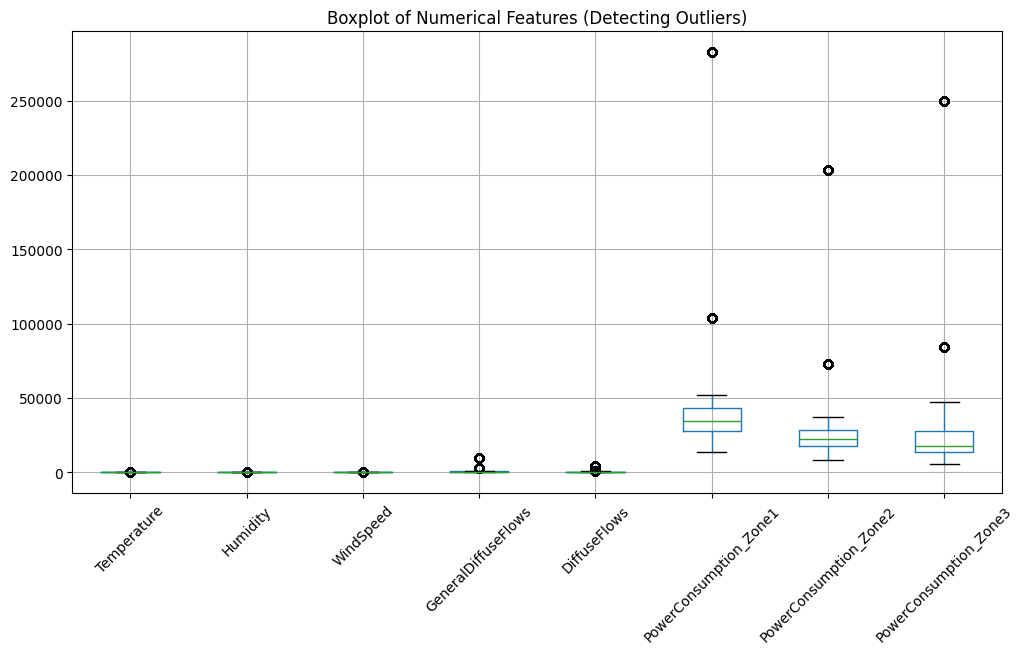

In [11]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Detecting Outliers)")
plt.show()



In [13]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
import builtins
print = builtins.print
print("Original Shape:", df.shape)
print("After IQR Outlier Removal:", df_iqr.shape)

Original Shape: (72675, 9)
After IQR Outlier Removal: (58641, 9)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before Removing Outliers
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Before Removing Outliers")
plt.show()

# After Removing Outliers
plt.figure(figsize=(12, 6))
df_iqr[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot After Removing Outliers")
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to numerical columns
df_scaled = df_iqr.copy()  # Work on a copy of the dataset
df_scaled[df_iqr.select_dtypes(include=['float64']).columns] = scaler.fit_transform(df_iqr.select_dtypes(include=['float64']))

# Display first few rows
print(df_scaled.head())

           Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  01-01-2017 00:00     0.094675  0.711895   0.005130             0.000040   
1  01-01-2017 00:10     0.090530  0.721498   0.005130             0.000057   
4  01-01-2017 00:40     0.076437  0.737961   0.004819             0.000038   
5  01-01-2017 00:50     0.074493  0.754424   0.004819             0.000047   
6  01-01-2017 01:00     0.068433  0.765400   0.004663             0.000038   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0      0.000163                0.526251                0.262361   
1      0.000112                0.415545                0.374886   
4      0.000112                0.350834                0.322796   
5      0.000146                0.332277                0.306992   
6      0.000128                0.315941                0.292325   

   PowerConsumption_Zone3  
0                0.343368  
1                0.340731  
4                0.300199  
5               

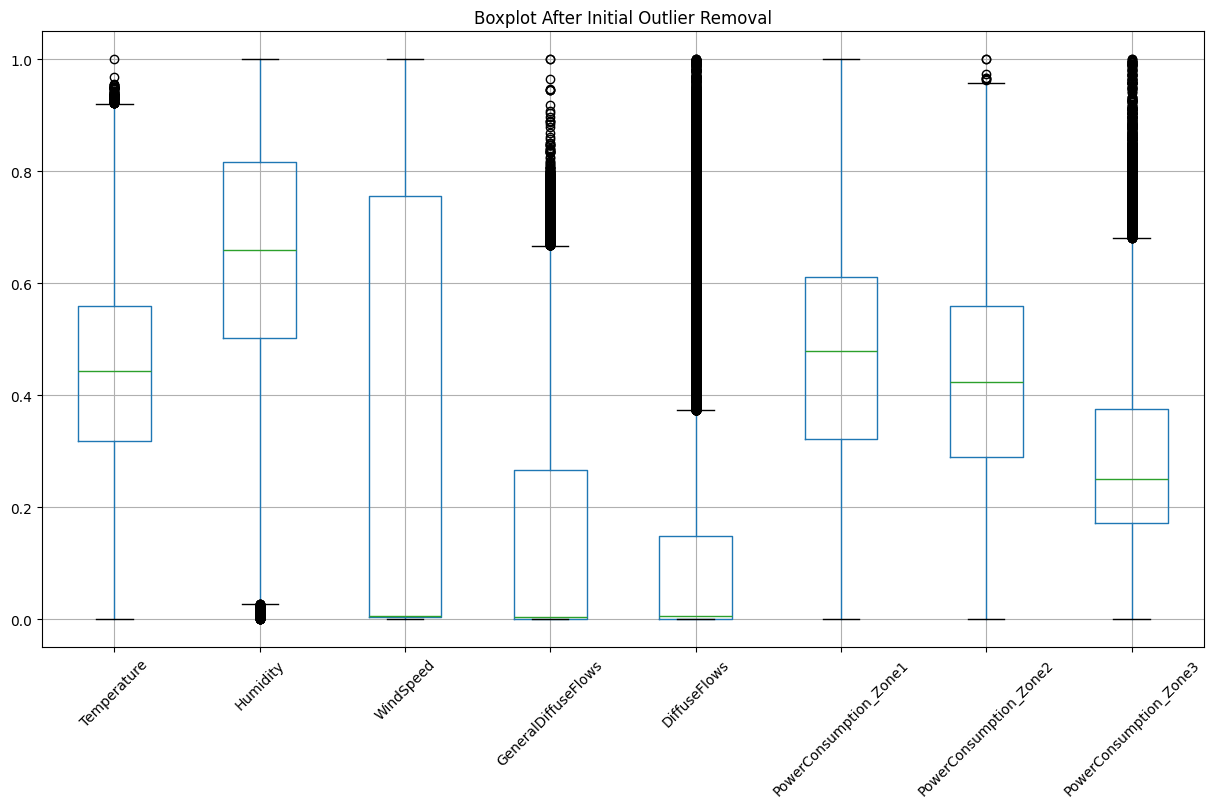

In [15]:
numerical_cols = df_scaled.select_dtypes(include=['float64']).columns

# Plot boxplots after initial outlier removal
plt.figure(figsize=(15, 8))
df_scaled[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot After Initial Outlier Removal")
plt.show()
